# CW2 Universal Workflow of Deep Learning with Python 4.5 

## Introduction

### Description of the chosen Dataset
Today, we will be following the DLWP 4.5 Universal Workflow blueprint and tensorflow to create a machine learning model for the prediction of housing prices that are influenced by several factors, such as location, local crime-rate and so on.
This model would be useful for real estate companies or individuals to determine the best possible price for buying and selling of homes.

This Boston Housing Price dataset set that our model will be built and trained on, is obtained from the SKLEARN Datasets.

### The problem
The problem of predicting house prices here in this dataset is a classic example of Supervised learning, as our housing dataset entirely consists of labelled datas and features for our model to learn from and use to classify data. Our model is also following a regression model, where our target, dependent variable (Price of a house) has a relationship between one or more independent variables.

### Measure of succcess

As we'd like our model to predict and return to us the best possible selling price for a house, the **accuracy** of our model's prediction is therefore paramount, thus having a high accuracy score will be the measure of success for our model.
Which, for a regression model can be calculated as the coefficient of determination, or R^2 Score

### Choice of Evaluation Protocol

To measure our progress, we will be maintaining a hold-out validation set in our models by using the Keras argument validation_split of 0.2 to automatically reserve apart of our training data as a hold-out validation set.
This evaluation protocol was chosen over the other protocols as we have plenty of data samples in our data set to be split into the training and validation sets.

### Target Value

As our Model will be used for the prediction of the House's Value, we will be looking at the MEDV ( Median Value of an owner-occupied house in $1000s, as our target value.

## Methodology

### Importing the relevant python libraries

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import keras_tuner as kt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


### Importing the dataset

In [3]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape) #get (numer of rows, number of columns or 'features')
print(boston.DESCR) #get a description of the dataset

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

In [4]:
# Next, we load the data into a 'dataframe' object for easier manipulation, and also print the first few rows in order to examine it
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head() #The target variable (MEDV) is not included

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
data.describe() #get some basic stats on the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
#Check for Null/Missing Data
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### Data Preparation and Visualization

In [6]:
#The loaded data does not include the target variable (MEDV), we have to add it
data['MEDV'] = pd.Series(data=boston.target, index=data.index) 

In [7]:
#Split the dataset into training and testing sets at a random 70/30 Ratio
train_dataset = data.sample(frac=0.7,random_state=0)
test_dataset = data.drop(train_dataset.index)

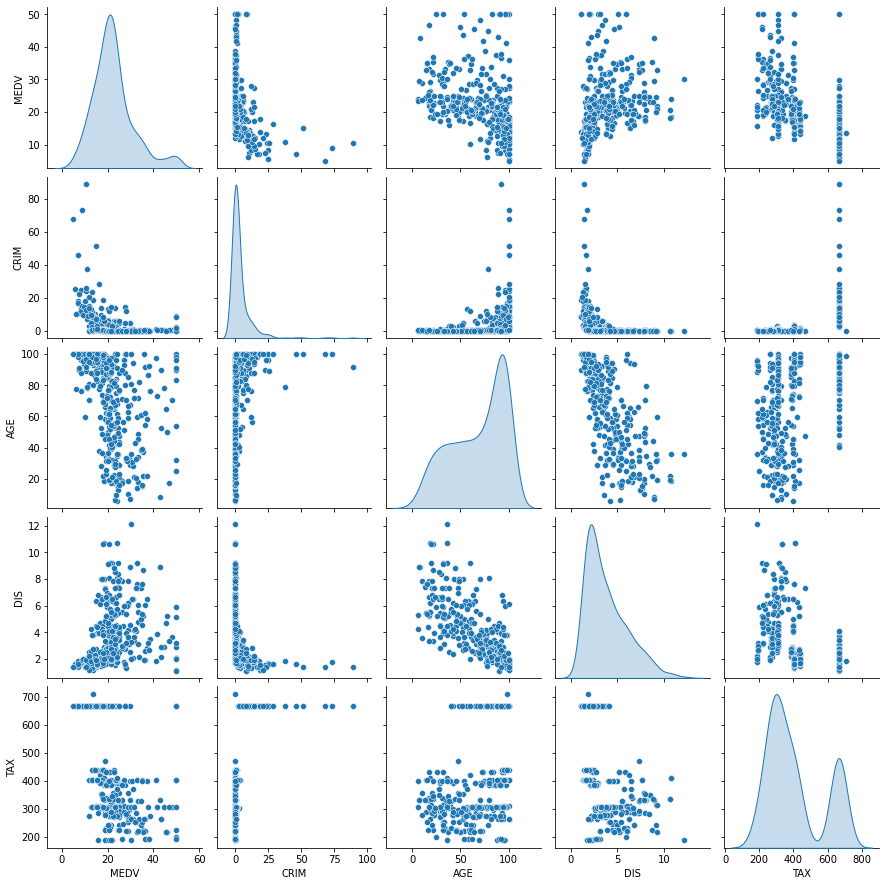

In [8]:
# Visualize the joint distribution of a few variables in our training set and the target value (MEDV) 
sns.pairplot(train_dataset[["MEDV", "CRIM","AGE","DIS","TAX"]], diag_kind="kde")

<AxesSubplot:>

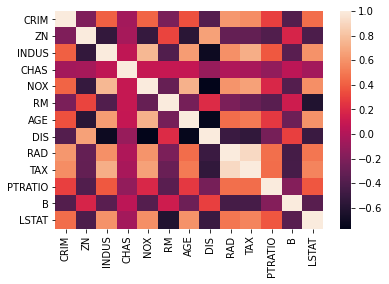

In [10]:
#Correlation Matrix
sns.heatmap(data.corr())

In [9]:
# Overall statistics of the training set
train_stats = train_dataset.describe()
train_stats.pop("MEDV")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.767375,9.418497,0.00906,0.082757,0.274475,3.077295,88.9762
ZN,354.0,11.079096,23.070178,0.00000,0.000000,0.000000,12.500000,95.0000
INDUS,354.0,11.185254,6.646944,0.74000,5.860000,9.795000,18.100000,27.7400
CHAS,354.0,0.070621,0.256554,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,354.0,0.554098,0.115748,0.38500,0.453000,0.538000,0.624000,0.8710
RM,354.0,6.265791,0.699380,3.56100,5.878250,6.175000,6.605500,8.7800
AGE,354.0,68.057627,27.953167,6.00000,45.100000,76.500000,93.750000,100.0000
DIS,354.0,3.844439,2.187514,1.12960,2.073700,3.207450,5.214600,12.1265
RAD,354.0,9.440678,8.569207,1.00000,4.000000,5.000000,20.000000,24.0000
TAX,354.0,407.500000,162.296676,187.00000,287.000000,337.000000,666.000000,711.0000


In [10]:
#Seperate the target value/variable called the label from the features of the dataset
#This label (Median Value) will be what we train our model to predict
train_labels = train_dataset.pop('MEDV')
test_labels = test_dataset.pop('MEDV')

In [11]:
#Normalize the data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

### Development and Building of Model

In [12]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [13]:
model = build_model();

In [14]:
#Print Summary of Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Test out the model
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.11416781],
       [-0.11657608],
       [ 0.34653157],
       [ 0.18004683],
       [-0.13140127],
       [-0.23149557],
       [-0.04268058],
       [-0.19187415],
       [-0.13207933],
       [ 0.06379557]], dtype=float32)

### Training of the Model

Train the model for 100 Epochs and record the training and validation accuracy in the `history` object

In [16]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [17]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MEDV]')
  plt.plot(hist['epoch'], hist['mae'], label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MEDV^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

In [18]:
EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,8.972905,2.057132,8.972905,5.504547,1.907009,5.504547,95
96,8.998064,2.075878,8.998064,5.709430,1.936750,5.709430,96
97,8.808635,2.041859,8.808635,6.842087,2.144336,6.842087,97
98,8.857334,2.076273,8.857334,5.969952,1.988869,5.969952,98
99,9.102741,2.072886,9.102741,5.714299,1.949857,5.714299,99


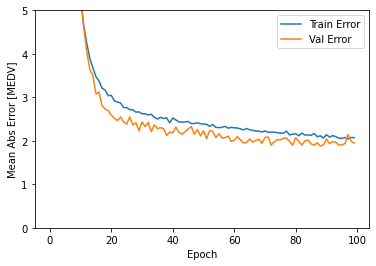

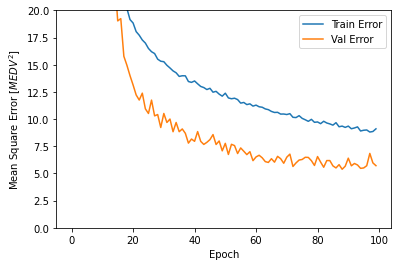

In [20]:
plot_history(history)

### Scaling up  of Model

Develop the model to overfit by increasing the number of Epochs it is trained on now

In [21]:
#Train the model on 1000 epochs instead of 100 now
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.700395,0.626986,0.700395,25.032402,2.896696,25.032402,995
996,0.427818,0.421463,0.427818,24.244183,2.882466,24.244183,996
997,0.440941,0.457145,0.440941,24.975922,2.893248,24.975922,997
998,0.786880,0.633827,0.786880,24.643757,2.921408,24.643757,998
999,0.434225,0.455340,0.434225,23.207773,2.825611,23.207773,999


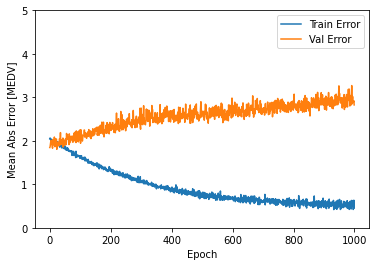

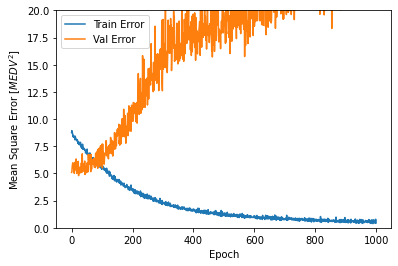

In [23]:
plot_history(history)

This Graph shows a very severe deprovement in the validation error after 100 Epochs, thus to correct this, we can update the model.fit call to automatically stop the training when the validation score does not improve using Early Stop, where if there is no improvement in the error of the epochs after a set number, the training is halted.

### Improve Fitting of Model Using Early Stop

In [24]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


...........................................................................................

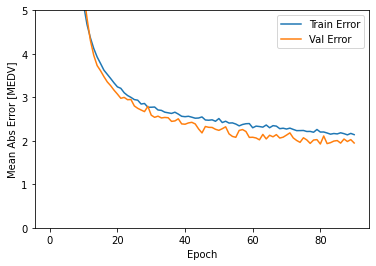

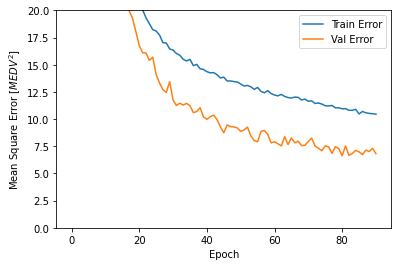

In [25]:
#Replot the history graph to see if there's any improvement
plot_history(history)

In [26]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MEDV".format(mae))

5/5 - 0s - loss: 12.7630 - mae: 2.5068 - mse: 12.7630 - 14ms/epoch - 3ms/step
Testing set Mean Abs Error:  2.51 MEDV


## Results

### Test out our model by using it to make predictions

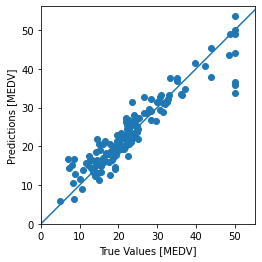

In [27]:
test_predictions = model.predict(normed_test_data).flatten()
train_predictions = model.predict(normed_train_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

### Error Analysis

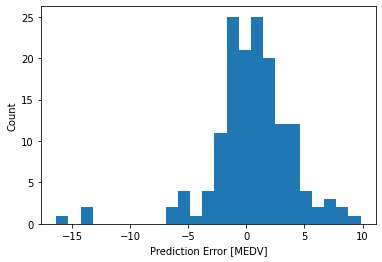

In [28]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")

### Retrieve our Measure of Success of the Model (R2_Score)

In [29]:
#Retrive our measure of success of the model which is the R-squared value of our model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(test_labels, test_predictions)
print('Mean Squared Error: ',mse)
mae = mean_absolute_error(test_labels, test_predictions)
print('Mean Absolute Error: ',mae)
rsq = r2_score(train_labels,train_predictions) #R-Squared on the training data
print('R-square, Training: ',rsq)
rsq = r2_score(test_labels,test_predictions) #R-Squared on the testing data
print('R-square, Testing: ',rsq)

Mean Squared Error:  12.762972637487627
Mean Absolute Error:  2.5067780664092614
R-square, Training:  0.8804849567100291
R-square, Testing:  0.8710486918310316


### Comparison of our Model vs a Linear Regression Model 

Let us compare the measure of success of our model, the R-Squared Score, with that of a basic linear regression model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop('MEDV', axis = 1) #define independent predictor set (excluding the dependent variable)
Y = data['MEDV'] #define the target values (i.e. the dependent variable)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

lm = LinearRegression()
lm.fit(X_train,Y_train)
Y_pred_train = lm.predict(X_train) #predictions on training data
Y_pred = lm.predict(X_test) #predictions on testing data

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test,Y_pred)
print('Mean Squared Error: ',mse)
mae = mean_absolute_error(Y_test,Y_pred)
print('Mean Absolute Error: ',mae)
rsq = r2_score(Y_train,Y_pred_train) #R-Squared on the training data
print('R-square, Training: ',rsq)
rsq = r2_score(Y_test,Y_pred) #R-Squared on the testing data
print('R-square, Testing: ',rsq)

Mean Squared Error:  28.530458765974586
Mean Absolute Error:  3.4550349322483482
R-square, Training:  0.7551332741779998
R-square, Testing:  0.6956551656111607


Our Model shows a remarkable improvement in the R-square values of both the Training and Testing set over that of a standard linear regression model, showing that our model has a good fit of the dataset.

## Conclusion

### Relevance of our model to the real-world

In [32]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MEDV".format(mae))

5/5 - 0s - loss: 12.7630 - mae: 2.5068 - mse: 12.7630 - 13ms/epoch - 3ms/step
Testing set Mean Abs Error:  2.51 MEDV


By reviewing the error statistics of our model, we can draw a conclusion that our model is highly accurate at predicting the Median Value of Houses based off the training data we have given it. An average error of only +/- $2,500 dollars off the mark.

However, further tuning and improvements to the model can be done to get it closer to the ideal, as seen below.

### Further tuning of the Model

In order to get our model closer to the ideal, we must regularize it and tune its' hyperparameters, which are settings that govern the training process of the model, such as the number of units per layer or the total number of layers, the learning rate of the optimizer and so on.

In order to tune the hyperparameters, we must search and test for the optimal hyperparameters for our model.

An easy way to tune our hyperparameters in TensorFlow would be to use the Keras Tuner, a library made to automate the hyperparameter search.

An example of this Keras Tuner to create and build a better deep learning model can be seen below. 

def build_model(hp):

    
    Builds model and sets up hyperparameter space to search.
    
    Parameters
    ----------
    hp : HyperParameter object
        Configures hyperparameters to tune.
        
    Returns
    -------
    model : keras model
        Compiled model with hyperparameters to tune.
    
    
    # Initialize sequential API and start building model.
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    
    # Add and Tune the number of hidden layers and units in each.
    # Number of hidden layers: 1 - 5
    # Number of Units: 32 - 512 with stepsize of 32
    for i in range(1, hp.Int("num_layers", 2, 6)):
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu")
            )
        
        # Add and Tune a dropout layer with values from 0 - 0.3 with stepsize of 0.1.
        model.add(keras.layers.Dropout(hp.Float("dropout_" + str(i), 0, 0.3, step=0.1)))
    
    # Add output layer.
    model.add(keras.layers.Dense(units=10, activation="softmax"))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    # Define optimizer, loss, and metrics
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=["accuracy"])
    
    return model